# [IAPR][iapr]: Project


**Group ID:** 32

**Author 1 (350508):** Ziyi ZHAO  
**Author 2 (321657):** Yujie HE  
**Author 3 (337088):** Xufeng GAO  

**Release date:** 02.02.2022


## Important notes

The assignments are designed to teach practical implementation of the topics presented during class as well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

---
## 0. Introduction

An anonymous card player that we will name Bartick Pruel is willing to improve his poker skills. To do so, he asked our lab to design a tool that will automatically detect the hands of the players around the table. 

---

## 1. Data

To achieve your task, you will be given images that look like this (without the overlay)


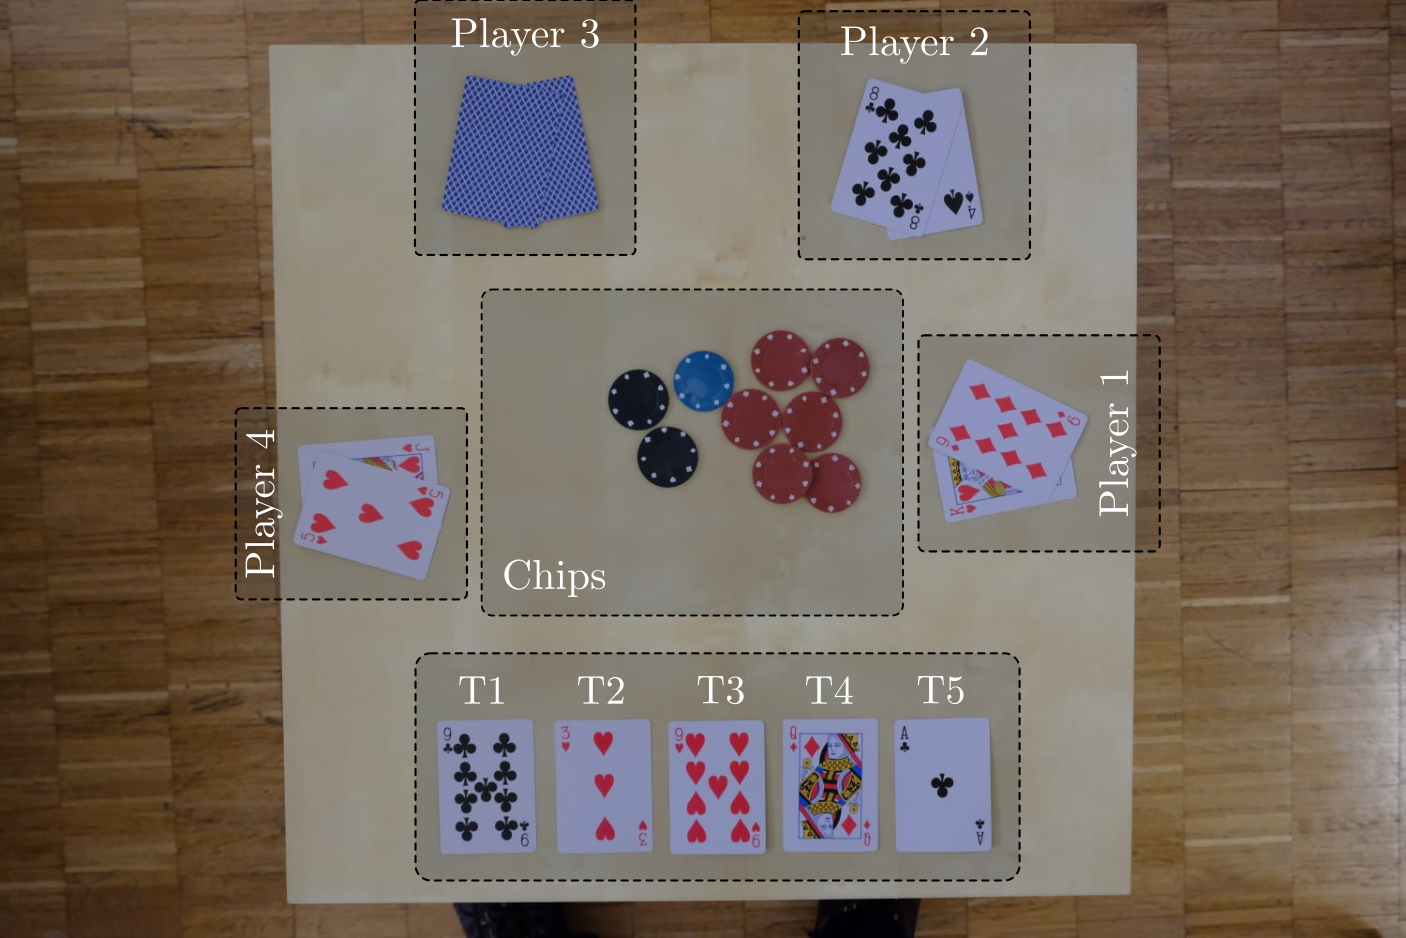

### 1.1. Table layout

The table is divided into 3 main parts:
* **Table cards (T1-T5)**: These cards are shared by every player. They are defined as the flop (T1-T3), the turn (T4) and the river (T5). The table cards are *always* visible.
* **Player cards (P11-P42)**: The cards played by each player (4 pairs). Each player *always* has 2 cards in hand. When a player is not playing, you can see the back of the cards (ex: player 3 here).
* **Chips**: The chips at the center of the table are named the pot.

### 1.2. Cards & Chips

The cards deck are composed of 52 cards split into 4 different colors: (D)imanond, (H)eart, (S)pade, (C)lub. Each color is composed of 13 different cards: 2, 3, 4, 5, 6, 7, 8, 9, 10, (J)ack, (Q)ueen, (K)ing and (A)ce.

Th chips can be of 5 different colors: (r)ed, (g)reen, (b)lue, blac(k) or (w)hite.


### 1.3 Structure

You can download the data for the project here: [download data](https://drive.google.com/file/d/1d7rOe88kEK1CEaLvYgNZkxrtKImLVC9X/view)

```
data 
│
└─── image_setup
│    │    back_cards.jpg      # Back of the cards (either blue or red)
│    │    chips.jpg           # Set of chips used (red, green, blue, black, white)
│    │    kings.jpg           # Kings from the 4 colors (diamond, heart, spade, club)
│    │    spades_suits.jpg    # All cards of spades (2 - 10, Jack, Queen, King, Ace)
│    │    table.jpg           # Empty table
│    └─── ultimate_test.jpg   # If it works on that image, you would probably end up with a good score
│
└─── train
│    │    train_00.jpg        # Train image 00
│    │    ...
│    │    train_27.jpg        # Train image 27
│    └─── train_labels.csv    # Ground truth of the train set
│
└─── test
     │    test_00.jpg         # Test image 00 (day of the exam only)
     │    ...
     └─── test_xx             # Test image xx (day of the exam only)
```


---

## 2. Tasks


Your task is to predict the following parameters for a set of images.

* **T1** (str): String code of the first card of the flop (far left) 
* **T2** (str): String code of the second card of the flop
* **T3** (str): String code of the third card of the flop
* **T4** (str): String code of the turn
* **T5** (str): String code of the river


* **P11** (str or int): String code of player 1 card 1. Should be 0 if player 1 is not Playing.
* **P12** (str or int): String code of player 1 card 2. Should be 0 if player 1 is not Playing.
* **P21** (str or int): String code of player 2 card 1. Should be 0 if player 2 is not Playing.
* **P22** (str or int): String code of player 2 card 2. Should be 0 if player 2 is not Playing.
* **P31** (str or int): String code of player 3 card 1. Should be 0 if player 3 is not Playing.
* **P32** (str or int): String code of player 3 card 2. Should be 0 if player 3 is not Playing.
* **P41** (str or int): String code of player 4 card 1. Should be 0 if player 4 is not Playing.
* **P42** (str or int): String code of player 4 card 2. Should be 0 if player 5 is not Playing.


* **CR** (int): Number of (r)ed chips in the pot
* **CG** (int): Number of (g)reen chips in the pot
* **CB** (int): Number of (b)lue chips in the pot
* **CK** (int): Number of blac(k) chips in the pot
* **CW** (int): Number of (w)hite chips in the pot


The output is saved using the function **save_results** as presented below.

---





## 3. Evaluation

**Before the exam**
   - Create a zipped folder named **groupid_xx.zip** that you upload on moodle (xx being your group number).
   - Include a **runnable** code (Jupyter Notebook and external files) and your presentation in the zip folder.
   
**The day of the exam**
   - You will be given a **new folder** with few images, but **no ground truth** (csv file).
   - We will ask you to run your pipeline in **real time** and to send us your prediction of the task you obtain with the provided function **save_results**. 
   - On our side, we will compute the performance of your classification algorithm. 
   - To evaluate your method, we will use the **evaluate_game** function presented below. To understand how the provided functions work, please read the documentation of the functions in **utils.py**.
   - **Please make sure your function returns the proper data format to avoid points penalty on the day of the exam**. 
---

## 4. Your code


### Image cutting / Area Labelling

#### Introduction

1. 图片切割坐标原点和参考系

  若采取原图坐标系和参考系，即左上角像素（0,0）处为坐标原点，图片长度和宽度为坐标系，**纸牌相对桌子的位置基本固定**，但由于桌子位置相对坐标原点的差异导致切割结果出现重大不确定性。**因此**使用桌子左上角顶点为坐标原点，桌子的长度为坐标系，此处认为桌子为标准的正方形。
 

2. 从原图中提取桌子区域

  坐标系：对图片进行预处理，包括erosion和灰度化，然后使用opencv进行轮廓检测。由于某些图像具有过曝等问题，因此个别检测结果不很理想。之后采用四边形拟合方法，获得桌子左上角顶点坐标。经过考察，所有正方形的左上角顶点均可完美拟合桌子顶点。

  参考系：由于拍摄时的角度差异带来的细微影响，桌子的长度有所不同，因此理论上需要建立不同的参考系，以确定具体的切割区域大小，但这部分任务较为复杂，考虑切割准确性并不精密，因此暂时默认所有图片中桌子长度所占像素个数均相等。

3. Summary

  **纸牌和chips相对桌子固定，但桌子位置相对于图片坐标原点不固定，因此需要首先在图片中提取桌面区域。**


**Useful notes**

1. OpenCV read image in BGR channel, as a narray
2. PIL read image as an object: PIL.JpegImagePlugin.JpegImageFile which can be tranfomed into narray using np.array(object)



- if code in Colab

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')
# sys.path.append('/content/drive/MyDrive/iapr/project/')

In [7]:
# std
from typing import Union, List
from glob import glob
import warnings
warnings.filterwarnings("ignore")
import os,sys

# imported
import cv2 as cv
import matplotlib.pyplot as plt
import PIL.Image
import numpy as np
import pandas as pd
from termcolor import colored
from treys import Card

# custom
from utils import eval_listof_games , debug_listof_games, save_results , load_results
from viz_utils import plotMultipleImages, vizCropProcedures
from preprocess_utils import cropTable, cropImgParts, PART_NAMES
from chip_utils import getChipRes
from card_utils import checkNoPlay, extractTableCard
from data_utils import getGameDict

In [8]:
project_dir_path = os.path.dirname(os.path.realpath("__file__"))
# '/home/he/projects/iapr/project'

In [9]:
# Global variables and functions

data_path = "data/train"
train_size = np.loadtxt(os.path.join(data_path, "train_size.txt")).astype(int)
file = os.path.join(data_path, f"train_{str(0).zfill(2)}.jpg")
im_origin = PIL.Image.open(file)

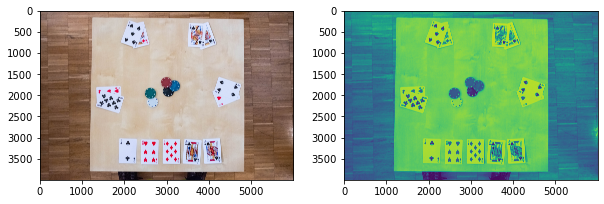

In [10]:
# Visualization
plt.figure(figsize=(10,10))
plt.subplot(1,2,1) 
plt.imshow(im_origin)
plt.subplot(1,2,2)
imgGrey = im_origin.convert('L')
plt.imshow(imgGrey)
plt.show()

## Extracting the desktop and creating a uniform coordinate system

In [11]:
from preprocess_utils import (
    addRectOffset,
    scaleRect,
    transRect,
    cropRectFromImg,
    preprocessImg,
    cropTableFromPre,
    cropTable,
)

### Example of processing single image

crop size (3554, 3489, 3)
crop image aspect ratio 1.0186299799369447


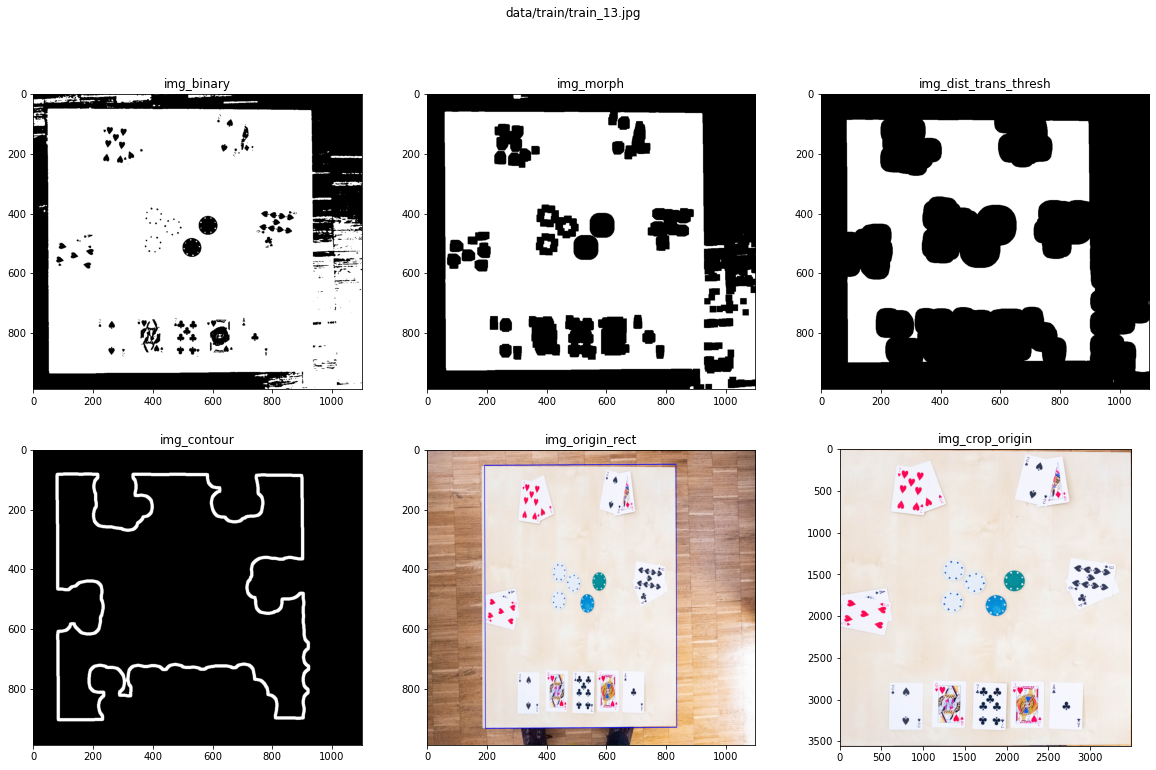

In [12]:
debug=True
test_files = [
    'data/train/train_13.jpg',
]
for file in test_files:
    img_crop_origin, rect, rect_origin, imgs_debug = cropTable(                                                                         
        file,
        kernel_sz=3,
        dist_thresh=0.2,
        edge_dilate_nr=5,
        use_convex_hull=False,
        resize_flag=True,
        resize_scale=4.0,
        crop_sz=(800, 20),
        rect_offset=50,
        debug=debug,
    )
    
    if debug:
        vizCropProcedures(imgs_debug, img_crop_origin, figsize=(20, 12), main_title=file)

### Example of processing batch images

In [13]:
debug=False

tables_crop = []
for i in range(train_size):
    # print('Image number: {}'.format(i))
    file = os.path.join(data_path, f"train_{str(i).zfill(2)}.jpg") 
    
    table_crop_origin, rect, rect_origin, imgs_debug = cropTable(                                                                         
        file,
        kernel_sz=3,
        dist_thresh=0.2,
        edge_dilate_nr=5,
        use_convex_hull=False,
        resize_flag=True,
        resize_scale=4.0,
        crop_sz=(800, 20),
        rect_offset=50,
        debug=debug,
    )
    tables_crop.append(table_crop_origin)
    
    if debug:
        vizCropProcedures(imgs_debug, table_crop_origin, figsize=(20, 12), main_title=file)
print('Finish cropping tables')

Finish cropping tables


## Extraction of different label areas in the table

In [14]:
from preprocess_utils import cropImgParts, PART_NAMES

### Example of crop parts of single image

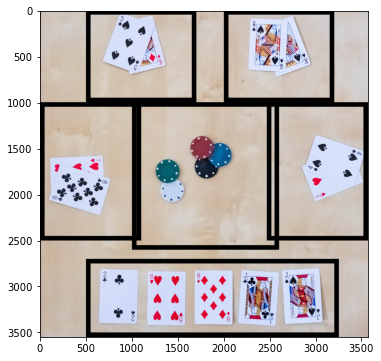

In [15]:
test_table_crop = tables_crop[0]
test_im_parts = cropImgParts(test_table_crop, viz_inplace=True, fig_title=None)

### Example of crop parts of all images

In [16]:
viz_parts=False
viz_inplace=False
# im_parts_dict = {im_name: [] for im_name in PART_NAMES}
im_parts_list = []
for img_id, table_crop in enumerate(tables_crop):
    test_im_parts = cropImgParts(
        table_crop, 
        viz_parts=viz_parts, 
        viz_inplace=viz_inplace,
        fig_title='Image '+str(img_id)
    )
    im_parts_list.append(test_im_parts)
#     for idx, im_name in enumerate(PART_NAMES):
#         im_parts_dict[im_name].append(test_im_parts[idx])
print('Finish cropping parts')

Finish cropping parts


## Detect chips with different number and colors

### Example of detecting single image

In [17]:
# from chip_utils import getChipRes

results: [1, 1, 1, 1, 1]


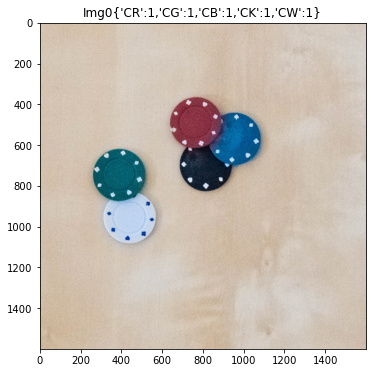

In [18]:
test_id = 0
img_chip_np = np.asarray(im_parts_list[test_id][5])
getChipRes(
    img_chip = img_chip_np, 
    img_id = test_id,
    viz_res=True,
    debug=False,
)
print('results:', [getGameDict(test_id)[key] for key in ['R', 'G', 'B', 'K', 'W']])

### Example of detecting batch of all images

In [19]:
viz_res = False
imgs_chip = [np.asarray(im_parts_list[i][5]) for i in range(len(im_parts_list))]
for img_id, img_chip in enumerate(imgs_chip):
    getChipRes(
        img_chip = img_chip, 
        img_id = img_id,
        viz_res=viz_res,
        debug=False,
    )
    if viz_res:
        print('results:', [getGameDict(img_id)[key] for key in ['R', 'G', 'B', 'K', 'W']])
print('Finish detecting chips')

Finish detecting chips


## Extract table cards

###  Example of crop 5 parts of single image

In [20]:
# from card_utils import extractTableCard

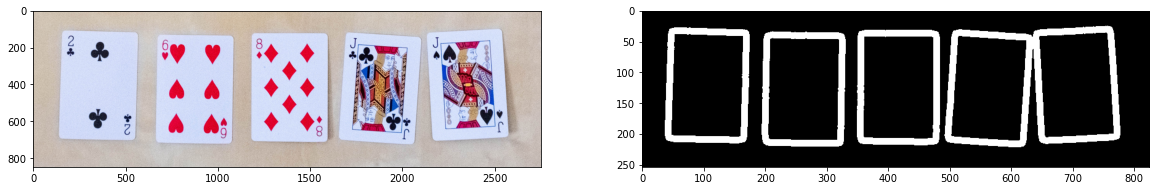

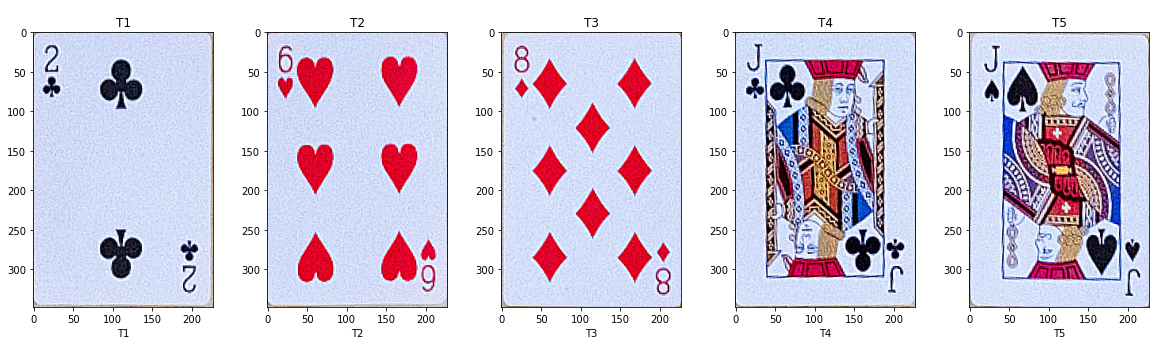

In [21]:
test_id = 0
img_part_t = np.asarray(im_parts_list[test_id][4])
test_img_table_cards = extractTableCard(img_part_t=img_part_t, debug=True)

### Example of crop 5 parts of batch images

In [22]:
img_table_cards_list = []
for idx, im_parts in enumerate(im_parts_list):
    img_part_t = np.asarray(im_parts[4])
    img_table_cards = extractTableCard(img_part_t=img_part_t, debug=False)
    img_table_cards_list.append(img_table_cards)
print('Finish extracting table cards')

Finish extracting table cards


## Detect table cards

In [42]:
from yolodetector.detect import detectFromNp, loadYoloModel
from detect_utils import detectTableCard

### Example of simple image

Loading weights from /home/he/projects/iapr/project/yolodetector/backup/hardest.weights... Done!
{'T1': '2C', 'T2': '6H', 'T3': '8D', 'T4': 'JC', 'T5': 'JS'}


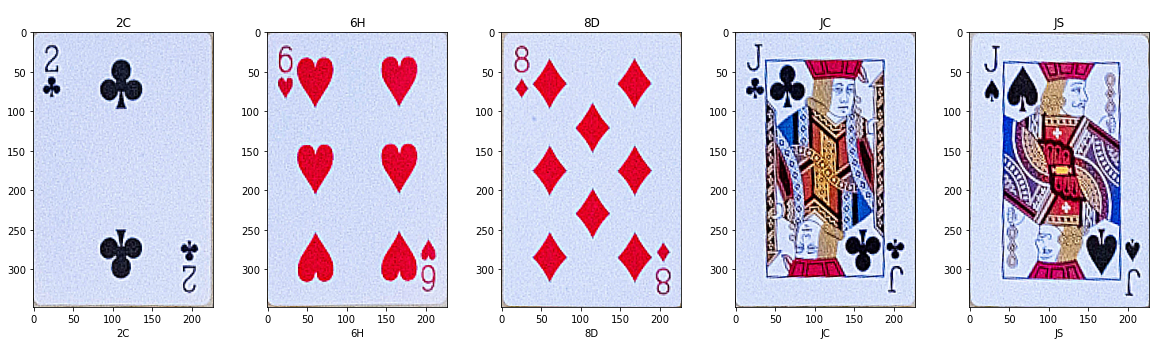

In [51]:
debug = True
model = loadYoloModel()
img_table_cards = test_img_table_cards

t15_results = detectTableCard(img_table_cards, model, debug=debug)

### Example of batch images

In [52]:
# debug = True
# model = loadYoloModel()
# for idx, img_table_cards in enumerate(img_table_cards_list):
#     print(idx)
#     detectTableCard(img_table_cards, model, debug=debug)

## Detect player cards

In [25]:
test_p1 = im_parts_list[1][0]
test_p2 = im_parts_list[1][1]

In [28]:
detected_res = detectFromNp(test_p2, model)
print(detected_res)

{'KH': 0.9493048191070557, '3C': 0.9462911486625671}


## [To debug!!!] Check not-playing

> Should be 0 if player is not Playing.

In [20]:
from card_utils import checkNoPlay

## red
Intensity: [0. 0. 0. 0.]
Playing: [0 1 2 3]
## blue
Intensity: [0.01684065 0.03305481 0.         0.02006142]
Playing: [0 2 3]
[True, False, True, True]


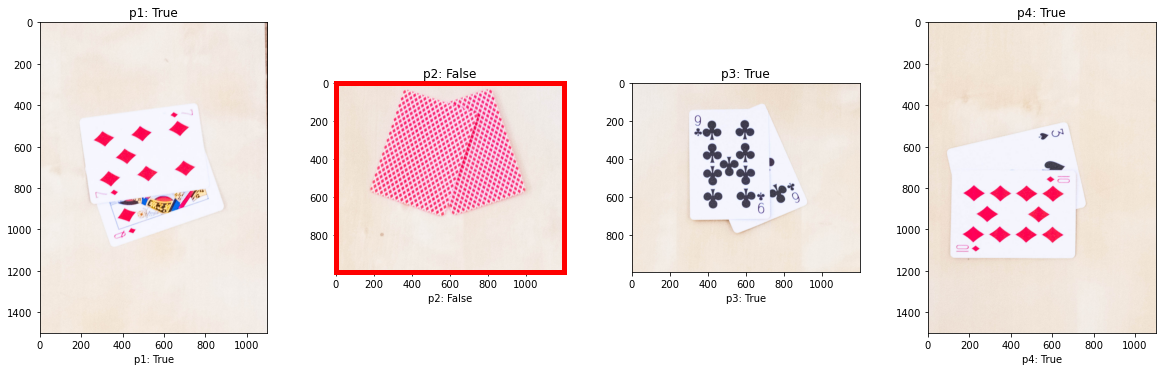

In [21]:
img_players = test_im_parts[:4]
playing_status = checkNoPlay(img_players, debug=True)

In [22]:
for idx, im_parts in enumerate(im_parts_list):
    img_players = [np.array(im) for im in im_parts[:4]]
    res = checkNoPlay(img_players, debug=False, fig_title=idx)
print('Finish checking playing status')

Finish checking playing status


## Original Code

In [46]:
def process_image(
    file,
    debug=False,
    viz_parts=False,
    verbose=True,
):
    img_id = file.split('/')[-1][:-4]
    # step1: crop table from origin image
    table_crop, rect, rect_origin, imgs_debug = cropTable(
        file,
        kernel_sz=3,
        dist_thresh=0.2,
        edge_dilate_nr=5,
        use_convex_hull=False,
        resize_flag=True,
        resize_scale=4.0,
        crop_sz=(800, 20),
        rect_offset=50,
        debug=debug,
    )
    # step: crop different image parts
    img_parts = cropImgParts(
        table_crop,
        viz_parts=viz_parts,
        viz_inplace=debug,
        fig_title='Image ' + str(img_id),
    )
    # step3: detect chips number and color
    img_chip_np = np.asarray(img_parts[5])
    chip_res = getChipRes(
        img_chip=img_chip_np,
        img_id=img_id,
        viz_res=debug,
        debug=False,
    )
    if verbose:
        print(chip_res)

    # step4: detect T1-T5 cards with YOLO detector
    img_part_t = np.asarray(img_parts[4])
    img_table_cards = extractTableCard(img_part_t=img_part_t, debug=debug)
    model = loadYoloModel()
    t15_results = detectTableCard(img_table_cards, model, debug=debug)
    if verbose:
        print(t15_results)

    # step5: check not-playing ids -> List[bool]
    img_players_np = np.asarray(img_parts[:4])
    playing_status = checkNoPlay(
        img_players=img_players_np,
        intensity_thresh=0.8,
        red_thresh=0.2,
        blue_thresh=0.023,
        debug=debug,
        fig_title=img_id,
    )

    # step6: detect players' cards
    # player_results = detectPlayerCards(playing_status)
    player_results = {}

    # step7: merge all results
    # dummy_results = {**t15_results, **player_results, **chip_res}

    dummy_results = {
        # Flop, river and turn
        "T1": "2C",
        "T2": "AH",
        "T3": "8D",
        "T4": "JC",
        "T5": "JS",
        # Player cards
        "P11": '2H',
        "P12": '3C',
        "P21": 'KS',
        "P22": "QS",
        "P31": "KD",
        "P32": "5S",
        "P41": "7H",
        "P42": "8H",
        # Chips
        "CR": 1,
        "CG": 1,
        "CB": 1,
        "CK": 5,
        "CW": 0,
    }
    return dummy_results

crop size (3516, 3526, 3)
crop image aspect ratio 0.9971639251276234
{'CR': 4, 'CG': 2, 'CB': 0, 'CK': 0, 'CW': 0}


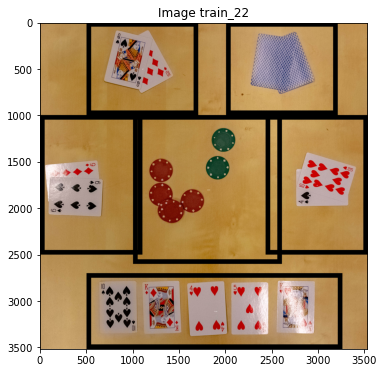

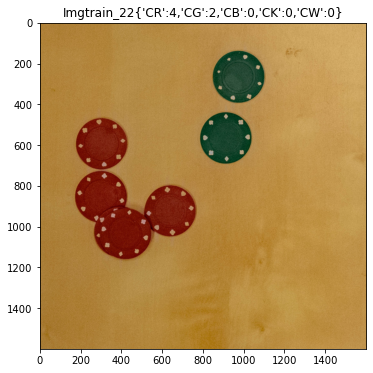

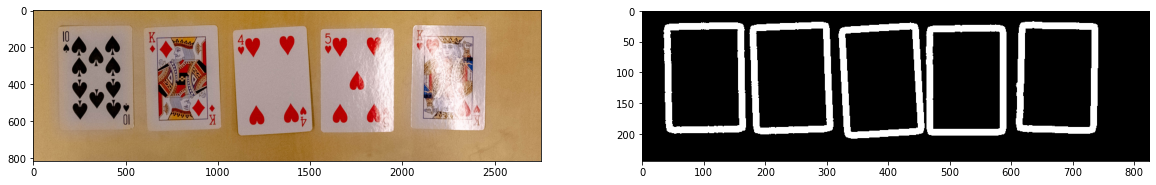

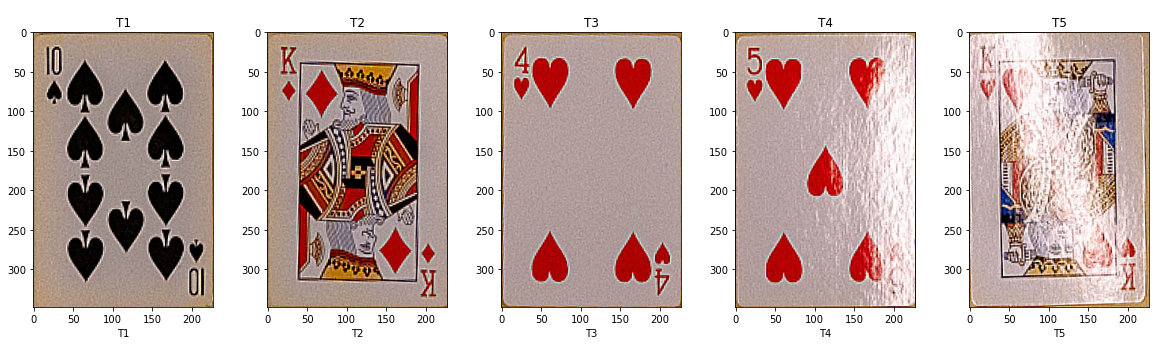

Loading weights from /home/he/projects/iapr/project/yolodetector/backup/hardest.weights... Done!
{'T1': '10S', 'T2': 'KD', 'T3': '4H', 'T4': '5H', 'T5': 'AH'}


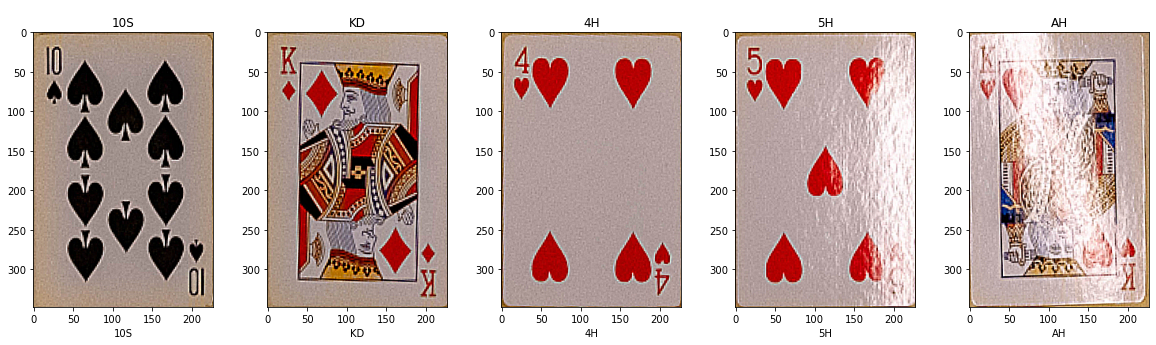

None
## red
Intensity: [0. 0. 0. 0.]
Playing: [0 1 2 3]
## blue
Intensity: [0.03264037 0.00033628 0.04859515 0.00931879]
Playing: [1 3]
[False, True, False, True]


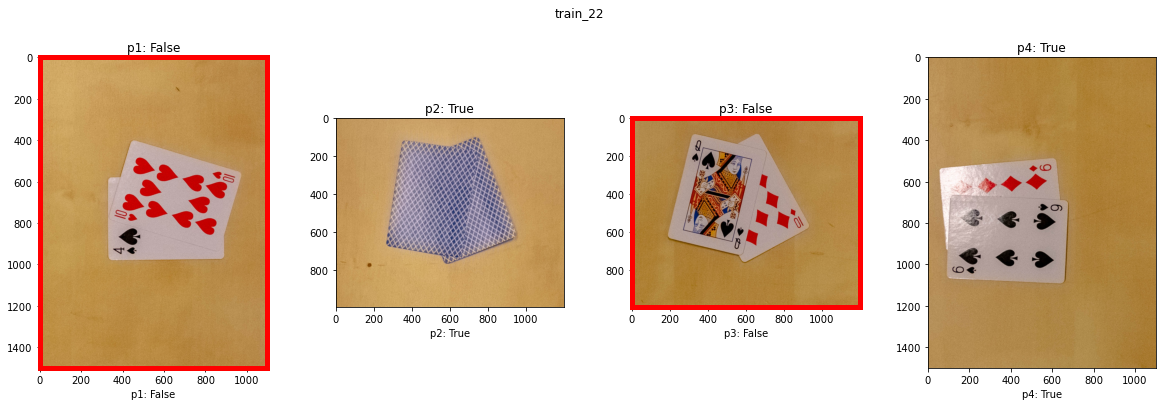

{'T1': '2C',
 'T2': 'AH',
 'T3': '8D',
 'T4': 'JC',
 'T5': 'JS',
 'P11': '2H',
 'P12': '3C',
 'P21': 'KS',
 'P22': 'QS',
 'P31': 'KD',
 'P32': '5S',
 'P41': '7H',
 'P42': '8H',
 'CR': 1,
 'CG': 1,
 'CB': 1,
 'CK': 5,
 'CW': 0}

In [47]:
process_image('data/train/train_22.jpg', debug=True)

In [25]:
def process_image(image) -> dict:
    """
    Process image and return information. To return the value of the cards we use 
    the following format: {number}{color}. Where 
        - color is either (D)imanond, (H)eart, (S)pade, (C)lub
        - number is either 2-10, (J)ack, (Q)ueen, (K)ing. A(ce).
            
    Parameters
    ----------
    image:
        Input image to process

    Returns
    -------
    results:
        - T1 (str): String code of the first card of the flop (far left) 
        - T2 (str): String code of the second card of the flop
        - T3 (str): String code of the third card of the flop
        - T4 (str): String code of the turn
        - T5 (str): String code of the river
        - P11 (str or int): String code of player 1 card 1. Should be 0 if player 1 is not Playing.
        - P12 (str or int): String code of player 1 card 2. Should be 0 if player 1 is not Playing.
        - P21 (str or int): String code of player 2 card 1. Should be 0 if player 2 is not Playing.
        - P22 (str or int): String code of player 2 card 2. Should be 0 if player 2 is not Playing.
        - P31 (str or int): String code of player 3 card 1. Should be 0 if player 3 is not Playing.
        - P32 (str or int): String code of player 3 card 2. Should be 0 if player 3 is not Playing.
        - P41 (str or int): String code of player 4 card 1. Should be 0 if player 4 is not Playing.
        - P42 (str or int): String code of player 4 card 2. Should be 0 if player 4 is not Playing.
        - CR (int): Number of (r)ed chips in the pot
        - CG (int): Number of (g)reen chips in the pot
        - CB (int): Number of (b)lue chips in the pot
        - CK (int): Number of blac(k) chips in the pot
        - CW (int): Number of (w)hite chips in the pot
        
    Examples
    --------
    - QH: Queen of hearths
    - 10S: 10 of spades
    - AC: Ace of clubs

    """
    
    # TODO: Amazing student code
    
    dummy_results = {
        # Flop, river and turn
        "T1": "2C", "T2": "AH", "T3": "8D", "T4": "JC", "T5": "JS",
        # Player cards
        "P11": '2H' , "P12": '3C', "P21": 'KS', "P22": "QS", "P31": "KD", "P32":"5S" , "P41": "7H", "P42": "8H",
        # Chips
         "CR": 1, "CG": 1, "CB": 1,"CK": 5, "CW": 0
    }
    return dummy_results


Working example

In [26]:
## load train size dataset
path_data = os.path.join(project_dir_path, "data", "train")
group_id = 32

In [27]:
## load train size dataset
train_size = np.loadtxt(os.path.join(path_data, "train_size.txt")).astype(int)
print("Size of trainset:\n\t{}".format(train_size))

# Load images from folder
game_results = {}

# Evaluate three images
games_id = [0,3]  # to evaluate  three images

for i in games_id :
    file = os.path.join(path_data, f"train_{str(i).zfill(2)}.jpg") # Fill the string with zeros until it is 2 characters long
    # open the image
    im = PIL.Image.open(file)
    # Process the image
    results = process_image(image=im)
    # Append result to array
    game_results[i] = results

# Outputs prediction of game 0
print("Prediciton game:\n\t{}: {}".format(0, game_results[0]))

Size of trainset:
	28
Prediciton game:
	0: {'T1': '2C', 'T2': 'AH', 'T3': '8D', 'T4': 'JC', 'T5': 'JS', 'P11': '2H', 'P12': '3C', 'P21': 'KS', 'P22': 'QS', 'P31': 'KD', 'P32': '5S', 'P41': '7H', 'P42': '8H', 'CR': 1, 'CG': 1, 'CB': 1, 'CK': 5, 'CW': 0}


In [28]:
# Saving results
file_results = save_results(results=game_results, groupid=group_id)

In [29]:
# Checking the results were loaded correctly
loaded_results = load_results(file_results)
print(loaded_results.keys())

dict_keys(['0', '3'])


# Evaluation and Debugging

In [30]:
def getGameDict(game_id=0, label_fn='data/train/updated_train_labels.csv'):
    game_labels = pd.read_csv('data/train/updated_train_labels.csv')
    game_labels = game_labels.fillna('0')
    game = game_labels.iloc[[game_id]]
    game_dict = {key:game.get(key).values[0] for key in game.columns}
    return game_dict

In [31]:
# Read training data
game_labels = pd.read_csv('data/train/updated_train_labels.csv')
game_labels = game_labels.fillna('0')
game_labels

Image   T1  T2   T3   T4   T5 P1.1 P1.2 P2.1 P2.2 P3.1 P3.2 P4.1 P4.2  \
0   Train_00   2C  6H   8D   JC   JS   2H   4S   KS   QS   KD   5S   7H   8C   
1   Train_01   9H  8C   2H   4C   JS    0    0   3C   KH   KD   2D   QS   3S   
2   Train_02   9D  3D   4C   6D   2H   7H   QD  10S  10C   5C   4S   2S   4H   
3   Train_03   6D  KH   7H   KC   6H   QC   QS   3C   3D   4H   5D   2S   7C   
4   Train_04   KC  3C   9C   QC  10C   8H  10D   AH   JD   3S   8S   5C  10S   
5   Train_05   8H  6D   4C   7D   AC   3D   KS   9D   6S    0    0   7H   7C   
6   Train_06   QS  5S   KS   KD   8C    0    0   6H   7D   8D   2C   JC   JD   
7   Train_07   7S  AD   6S   KH   9D   2D   9H    0    0    0    0   4H   5D   
8   Train_08   9C  4C   QC   7S   JD   QD   4D   8C  10C   9S   3C   5D   KC   
9   Train_09   8H  6D   4C   7D   AC   3D   KS   9D   6S    0    0   7H   7C   
10  Train_10   5D  KS   2H   6C   2C   3C   AS   8C   JH   9C   2S   6S   5S   
11  Train_11   9C  4C   QC   7S   JD    0    0    0    0    0    0    0    0   
12  Train_12   8H  6H   3H   7H   7C   AC   6D   2H   5C   2D   3D   KS   7D   
13  Train_13   2S  QH   7C   JH   AC   4C   9S   QD   2S   3H   7H   AC   5H   
14  Train_14   4S  AD   9D   4C  10D    0    0   AH   7C   KC   2D   6D  10H   
15  Train_15   AC  KD   8D   9D   4D    0    0    0    0    0    0    0    0   
16  Train_16   8S  KD   5D   AD   KC   2H   5S   JD   QC   8H   QD   AC   5C   
17  Train_17   8C  AH   JH  10S   5H    0    0   7S   QH   9S   2D   8D   3H   
18  Train_18   9S  5C  10S  10H   AD   JC   7H   KD   AS   3S   8S   4C   3C   
19  Train_19   JD  5H   9S   3H   8D    0    0   4D   KH   7S   QH    0    0   
20  Train_20   5H  JH   AS   QH   7C    0    0   QD  10D   4C   9S   2S   3H   
21  Train_21   7C  8D   6C   JC   6S  10H   5S   6D   2S   5D   AC   4H   QH   
22  Train_22  10S  KD   4H   5H   KH   4S  10H    0    0  10D   QS   9D   6S   
23  Train_23   JH  6H   8H   4S   AS  10C  10D   9S   KS    0    0    0    0   
24  Train_24   4D  2C   7S   5C   JD   QC   QD   3H   3D   5H   7D    0    0   
25  Train_25   7C  9H   4S   JS   3S   7D   6D   6S   9D   2C   KS   4H  10H   
26  Train_26   6S  QH   6H   JH   8H   2C   JC    0    0   JD   QC   4D   7S   
27  Train_27  10C  9S   7S   4C   AS   QD   7D    0    0   6C   9C   3S  10D   

    R  G  B  K  W  
0   1  1  1  1  1  
1   2  0  1  0  1  
2   0  0  8  1  0  
3   0  2  4  0  0  
4   3  1  1  0  2  
5   2  1  2  1  0  
6   1  0  0  0  0  
7   1  0  1  2  0  
8   0  0  0  0  0  
9   2  1  2  1  0  
10  1  1  3  0  2  
11  0  0  0  2  0  
12  3  1  5  0  3  
13  0  1  1  0  3  
14  0  0  5  3  1  
15  3  0  0  4  0  
16  0  0  4  0  2  
17  1  0  3  1  1  
18  0  3  3  0  2  
19  5  4  0  0  2  
20  0  0  0  4  0  
21  0  4  0  0  3  
22  4  2  0  0  0  
23  2  2  0  3  3  
24  2  1  0  2  1  
25  0  1  0  2  1  
26  1  1  0  1  2  
27  2  0  2  2  2

In [32]:
# Evaluate
eval_listof_games( game_results , game_labels , game_id = games_id)

Game 0 results
Estimated game
['2C', 'AH', '8D', 'JC', 'JS', '2H', '3C', 'KS', 'QS', 'KD', '5S', '7H', '8H', 1, 1, 1, 5, 0]
True game
['2C' '6H' '8D' 'JC' 'JS' '2H' '4S' 'KS' 'QS' 'KD' '5S' '7H' '8C' 1 1 1 1
 1]


             	scores
Card number 	0.85 %
Card suit   	0.85 %
Chips       	0.17 %


FINAL score 	0.62 %
________________________________________
Game 3 results
Estimated game
['2C', 'AH', '8D', 'JC', 'JS', '2H', '3C', 'KS', 'QS', 'KD', '5S', '7H', '8H', 1, 1, 1, 5, 0]
True game
['6D' 'KH' '7H' 'KC' '6H' 'QC' 'QS' '3C' '3D' '4H' '5D' '2S' '7C' 0 2 4 0
 0]


             	scores
Card number 	0.08 %
Card suit   	0.15 %
Chips       	0.0 %


FINAL score 	0.08 %
________________________________________
Average SCORE =  0.3482905982905983


0.3482905982905983

In [33]:
# Debug
debug_listof_games(game_results , game_labels, game_id = games_id)

Game 0 results
Estimated game
['2C', 'AH', '8D', 'JC', 'JS', '2H', '3C', 'KS', 'QS', 'KD', '5S', '7H', '8H', 1, 1, 1, 5, 0]
True game
['2C' '6H' '8D' 'JC' 'JS' '2H' '4S' 'KS' 'QS' 'KD' '5S' '7H' '8C' 1 1 1 1
 1]


________________________________________
Table mistakes in cards : [1]
True table
 [2♣],[6♥],[8♦],[J♣],[J♠] 
None
Found table
 [2♣],[A♥],[8♦],[J♣],[J♠] 
None


xxxxxPlayer 1 error
 True hand
 [2♥],[4♠] 
None
Estimated hand
 [2♥],[3♣] 
None


---->Player 2 found correctly [K♠],[Q♠] 
None


---->Player 3 found correctly [K♦],[5♠] 
None


xxxxxPlayer 4 error
 True hand
 [7♥],[8♣] 
None
Estimated hand
 [7♥],[8♥] 
None


---->Chip Red	found: 1. Count error: ( 0 )
---->Chip Green	found: 1. Count error: ( 0 )
---->Chip Blue	found: 1. Count error: ( 0 )
xxxxxChip Black	found: 5. Count error: ( 4 )
xxxxxChip White	found: 0. Count error: ( -1 )
________________________________________
________________________________________
Game 3 results
Estimated game
['2C', 'AH', '8D', 'JC', 'JS', 